Описание проекта
Я работаею в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Мне дали данные до 2016 года. По задаче сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
Описание данных

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

План исследования данных:
Подготовлю данные
Заменю названия столбцов;
Преобразую данные в нужные типы;
Обработаю пропуски при необходимости:
Объяснию, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишу причины, которые могли привести к пропускам;
Посчитаю суммарные продажи во всех регионах и запишите их в отдельный столбец.

Проведу исследовательский анализ данных

Посмотрю, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрю, как менялись продажи по платформам. 
Возьмиу данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Определю какие платформы лидируют по продажам, растут или падают? Выберу несколько потенциально прибыльных платформ.
Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построю диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесу выводы с продажами игр на других платформах.
Посмотрю на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Составлю портрет пользователя каждого региона

Определю для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверю гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Напишу общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

Шаг 1. Открыл файл с данными и изучил общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.duplicated(subset=['Name','Platform','Year_of_Release']).sum()

2

Выявлен 1 неявный дубликат

In [9]:
data=(data.loc[data[['Name','Platform','Year_of_Release']].duplicated(keep='first')!=True].reset_index(drop=True))
data.duplicated(subset=['Name','Platform','Year_of_Release']).sum()

0

По итогам первичного анализа необходимо:
- привести названия столбцов к нижнему регистру.
- Заменю тип данных столбца Year_of_Release на int т.к. это целое число
- столбцы Critic_Score и User_Score преобразую float
- так же часть столбцов содержат пропуски
- отсутствуют дубликаты(явные и неявные)

Шаг 2. Подготавливаю данные

2.1. Заменяю названия столбцов (приведите к нижнему регистру);

In [10]:
data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


2.2.Преобразую данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

year_of_release преобразую в int, так как это целое число
critic_Score и user_Score преобразую в float, так как это дробное число

In [11]:
data = data.astype({"critic_score": "float"})
data = data.astype({"year_of_release": "Int64"}) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Не смог сразуизменть User_Score в флоат. Система выдаёт ошибку. Предположу, что это связанно с пропусками и 'tbd' в столбце. Не буду бежать вперед задания и изменю тип после обработки столбца.

2.3.Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Пропуски есть в колонках :name, year_of_release, genre, critic_score, user_score, rating.

В колонке name всего 2 пропуска из 16715 сточек, можем удалить эти строки без потери качества анализа

In [13]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Дальше возьму year_of_release

In [14]:
data['year_of_release'].isna().sum()

269

In [15]:
'{:.1%}'.format((data[data['year_of_release'].isna()].shape[0]/data['year_of_release'].shape[0]))

'1.6%'

Так как 1,6%<10% мы можем удалить и эти строки без значительной потери данных для анализа

In [16]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Дальше возьму critic_score и user_score так как по логике их можно обработать идентично

In [17]:
data['critic_score'].isna().sum()

8461

In [18]:
data['user_score'].isna().sum()

6605

In [19]:
'{:.1%}'.format((data[data['critic_score'].isna()].shape[0]/data['critic_score'].shape[0]))

'51.5%'

In [20]:
'{:.1%}'.format((data[data['user_score'].isna()].shape[0]/data['user_score'].shape[0]))

'40.2%'

Проценты пропусков слишком большие, их нельзя просто так удалить. 
В большинстве случаев оценки на разных платформах +- идентичны, так что мы можем взять медианные значения по играм.
Только нужно помнить про TBA в данных

TBD — это аббревиатура, которая обозначает «To Be Determined» (англ. «будет определено»). Т.е. это то же самое, что неизвестное значение. Поэтому, можно смело заменить значение 'tbd' на 'NaN'.

In [21]:
data.loc[data.user_score=='tbd', 'user_score'] = np.nan
data.user_score = data.user_score.astype('float')

In [22]:
data['user_score'] = data['user_score'].fillna(-1)

In [23]:
data['critic_score'] = data['critic_score'].fillna(-1)

Дальше возьму rating и обработаем так же как раньше

In [24]:
'{:.1%}'.format((data[data['rating'].isna()].shape[0]/data['rating'].shape[0]))

'40.6%'

Заполним пропуски формулировкой "Нет рейтинга"

In [25]:
data.rating.fillna('No rating', inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [27]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Оставлю такие пропуски так как удалять эти строчки нельзя, а средние "по жанрам","странам продажи" или "году" брать не логичною

2.4.Посчитаю суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No rating,31.38


По итогам подготовки данных были выполнены следующие работы:
- скоректирова названия столбцов
- скоррктированы типы данных с учётом их особенностей 
- заменил пропущенные значение
- удалили строки с пропусками, итоговое удаление строк составляет менее 10%, тем самым мы сохраняем корректность анализа
- добавлена колонка суммарных продаж по всем регионам

In [30]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Шаг 3. Провожу исследовательский анализ данных

3.1. Проведу анализ, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

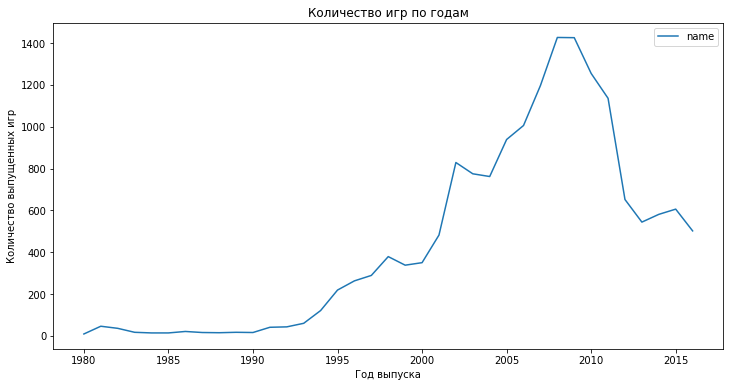

In [31]:
games_by_each_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_each_year)
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

In [32]:
data.groupby('year_of_release')[['name']].count()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


По полученным данным сможем сделать следующие выводы:
- Пик проданных и выпущенных приходится на период с 2008 по 2009 год. После все пошло на спад.
- Я считаю, что не все данные можно использовать для будущего анализа так как до 1995 года выпускалось менее 200 игр в год.

3.2. Проверю, как менялись продажи по платформам. Необходимо выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

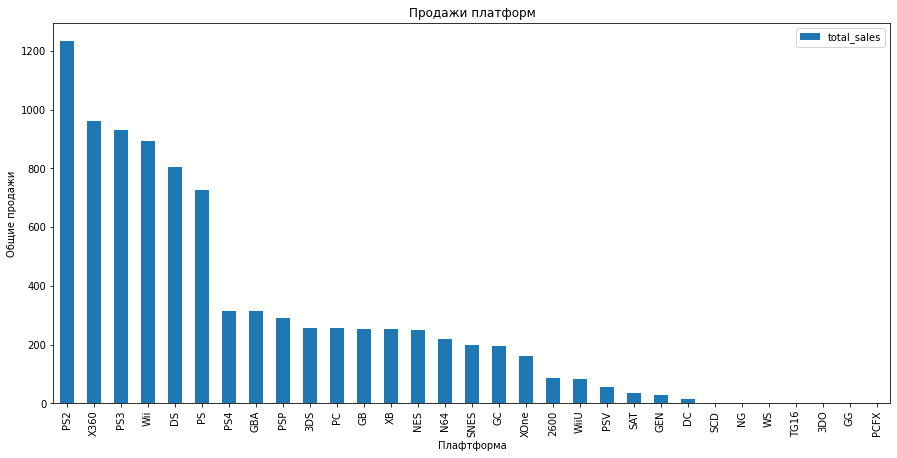

In [33]:
data.groupby('platform').agg({'total_sales' : 'sum'}).sort_values(
    by='total_sales', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Плафтформа')
plt.ylabel('Общие продажи')
plt.title('Продажи платформ');
plt.show()

In [34]:
platform_ts=data.pivot_table(index='platform',values=['total_sales'],aggfunc={'total_sales':'sum'}).sort_values(by='total_sales',ascending=False)
platform_ts

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Cамые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

In [35]:
def platforms(platform):
    data[data['platform'] == platform].groupby(
        'year_of_release').agg({'total_sales' : 'sum'}).plot(
        kind='bar', figsize=(8, 4))
    plt.xlabel('год')
    plt.ylabel('общая выручка (млн)')
    plt.title(platform)

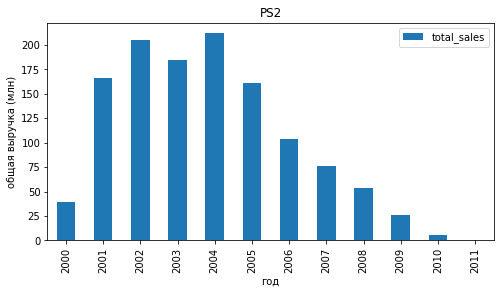

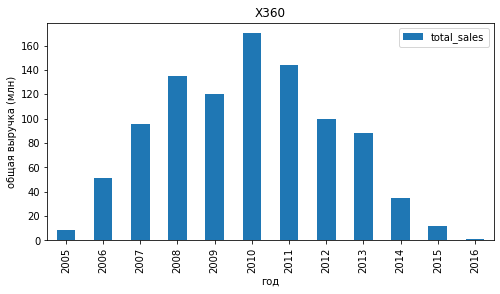

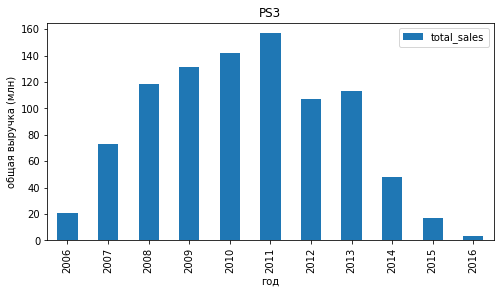

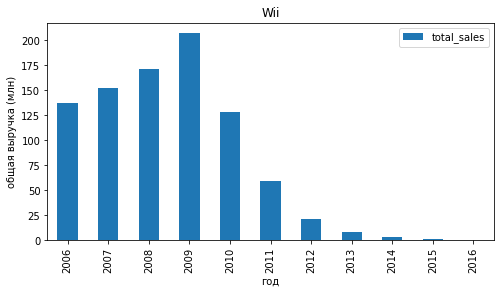

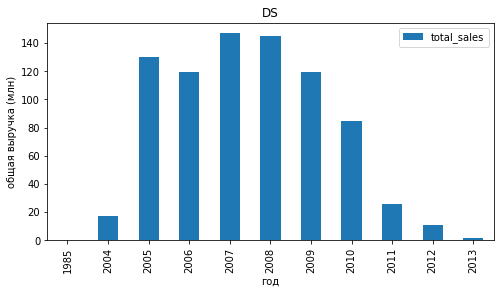

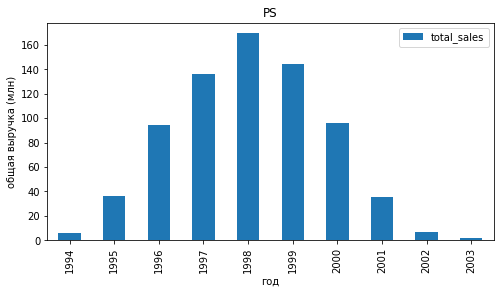

In [36]:
platforms('PS2')
platforms('X360')
platforms('PS3')
platforms('Wii')
platforms('DS')
platforms('PS')

Рассмотренные платформы являются актуальными примерно 6-7 лет после появления на рынке. 
Видим, что устройства консоли от Sony занимают 3 из 6 лидирующих позиций и спад продаж 1 консоли начинается после возниковения устройства следующего поколения.

In [37]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Возьму данные за соответствующий актуальный период. Актуальный период определю самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не буду учитывать в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

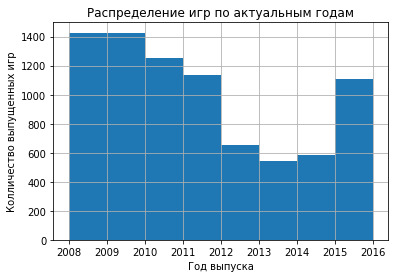

In [38]:
platform_list_year=['2010','2011','2012','2013','2014','2015','2016']
year_slice = data.query('year_of_release > 2007')
year_slice['year_of_release'].hist(bins=8)
plt.title('Распределение игр по актуальным годам')
plt.xlabel('Год выпуска')
plt.ylabel('Колличество выпущенных игр')
plt.show()

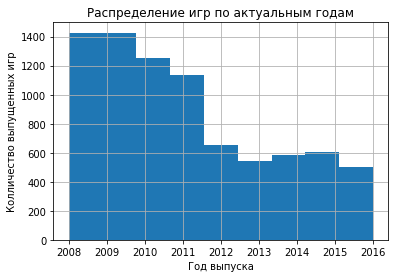

In [39]:
platform_list_year=['2010','2011','2012','2013','2014','2015','2016']
year_slice = data.query('year_of_release > 2007')
year_slice['year_of_release'].hist(bins=9)
plt.title('Распределение игр по актуальным годам')
plt.xlabel('Год выпуска')
plt.ylabel('Колличество выпущенных игр')
plt.show()

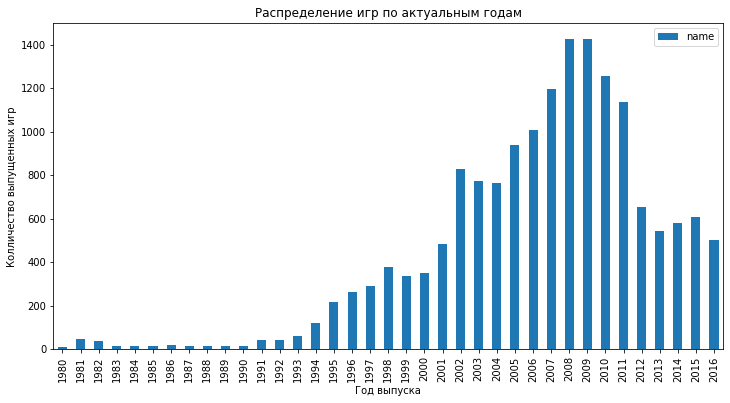

In [40]:
data_years = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
data_years.plot(kind="bar",figsize=(12, 6));
plt.title('Распределение игр по актуальным годам')
plt.xlabel('Год выпуска')
plt.ylabel('Колличество выпущенных игр')
plt.show()

<span style="color:blue">До 1995 года,выпускалось достаточно мало игр. С развитием технологий колличество игры увеличивалось и мы видим пик в районе 2008-2009 года.
На основании этих данных можно сделать вывод,что "актуальный период"- данные с 2012го года.</span> 

<span style="color:blue">3.3 Возьму данные за соответствующий актуальный период. Актуальный период определили на основании прерыдущих данных и установим его на границ 2012 года. Не буду учитывайть в работе данные за предыдущие годы.</span> 

In [41]:
new_data = data.query('year_of_release > 2012')

In [42]:
new_platform_sales = new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
new_platform_sales

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


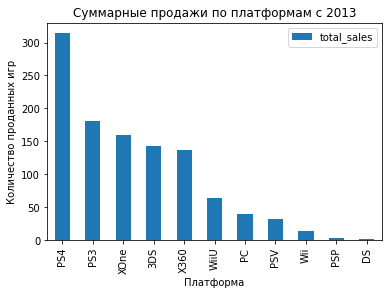

In [43]:
new_platform_sales.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр')
plt.title('Суммарные продажи по платформам c 2013')
plt.show()

По проведенному анализу видем, что максимальные продажи за последние годы имеет PS4 и PS3 связываю это с тем, что платформ от sony много фанатов и они перешли со старой версии на новую. Такую же тенденцию видем в соотношении Xone и X360. Для простроения планов на 2017 год есть смысл смотреть в сторону этих устройств

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

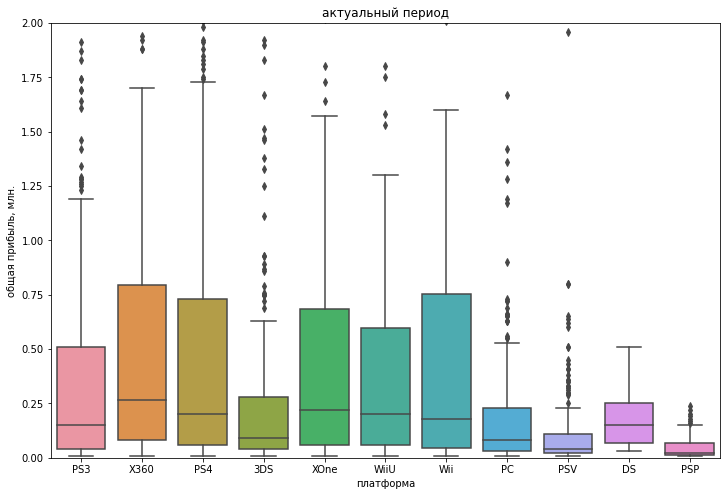

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=new_data)
plt.xlabel('платформа')
plt.ylabel('общая прибыль, млн.')
plt.title('актуальный период')
plt.ylim(0, 2);

C 2014 года старые платформы становятся неактуальными, а новые поколения встают в лидирующие позциии по продажам игр, однако потом идёт общий упадок продаж.
На самом последнем месте оказались портативные приставки.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Диаграмма рассеяния для PS4


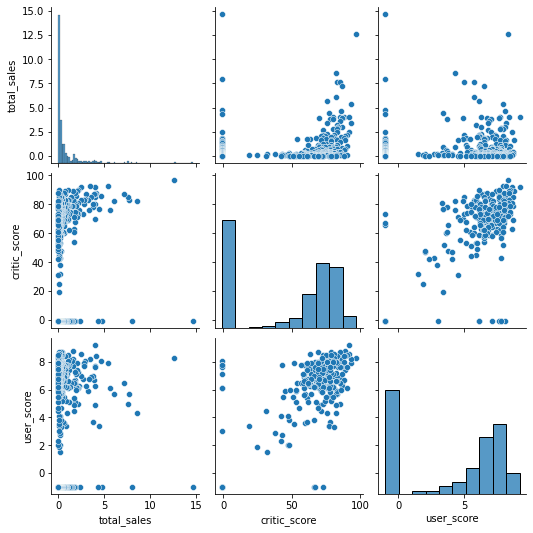

In [45]:
print("Диаграмма рассеяния для PS4")
sns.pairplot(new_data[new_data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()


<span style="color:blue">Построил отдельные диаграммы рассеивания для колличества продаж и оценок пользователей и критиков</span> 

In [46]:
critic_score_data = data[data['critic_score'] !=-1]

In [47]:
user_score_data = data[data['user_score'] !=-1]

In [48]:
score_data = new_data[(new_data['critic_score'] !=-1) & (new_data['user_score']!=1)]

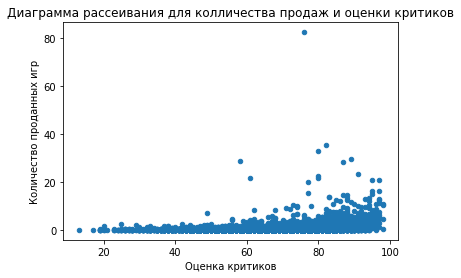

In [49]:
critic_score_data.plot(
   x='critic_score', 
   y='total_sales', 
   kind='scatter'
)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных игр')
plt.title('Диаграмма рассеивания для колличества продаж и оценки критиков')
plt.show()

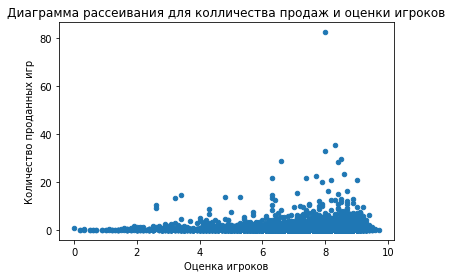

In [50]:
user_score_data.plot(
   x='user_score',  
   y='total_sales', 
   kind='scatter'
)
plt.xlabel('Оценка игроков')
plt.ylabel('Количество проданных игр')
plt.title('Диаграмма рассеивания для колличества продаж и оценки игроков')
plt.show()

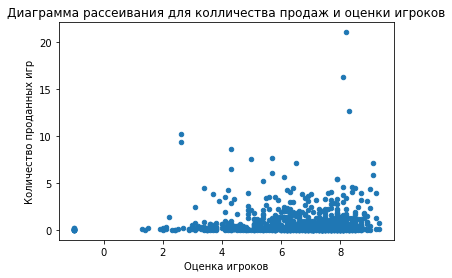

In [51]:
score_data.plot(
   x='user_score',  
   y='total_sales', 
   kind='scatter'
)
plt.xlabel('Оценка игроков')
plt.ylabel('Количество проданных игр')
plt.title('Диаграмма рассеивания для колличества продаж и оценки игроков')
plt.show()

В целом видим очевидную закономерность, чем лучше рейтинг, тем игра лучше, следовательно больше продаж.
Есть и "аномалии" где игры, которые имеют высокую оценку,при этом мало продались

In [52]:
print("Матрица корреляций для платформы PS4")
score_data[score_data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций для платформы PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,0.001260
critic_score,0.406568,1.000000,0.496739
user_score,0.001260,0.496739,1.000000


Корреляция между total_sales и critic_score равна 0.4

Корреляции между total_sales и user_score равна 0.0012
Как мы видим, отзывы критиков влияют на продажи значительней чем оценки игроков

Соотнесу выводы с продажами игр на других платформах.

Расчет по Платформе 3DS


user_score     0.241504
total_sales    1.000000
Name: total_sales, dtype: float64

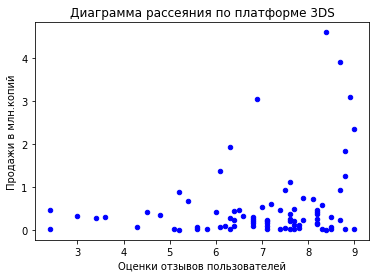

critic_score    0.357057
total_sales     1.000000
Name: total_sales, dtype: float64

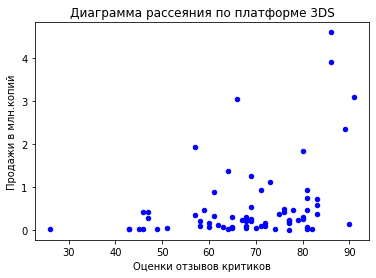

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score    -0.093842
total_sales    1.000000
Name: total_sales, dtype: float64

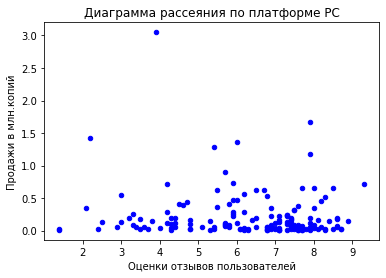

critic_score    0.19603
total_sales     1.00000
Name: total_sales, dtype: float64

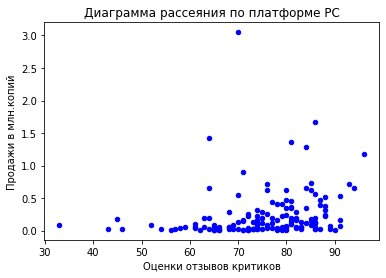

Расчет по Платформе PS3


user_score     0.002394
total_sales    1.000000
Name: total_sales, dtype: float64

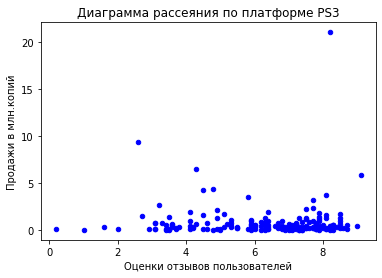

critic_score    0.334285
total_sales     1.000000
Name: total_sales, dtype: float64

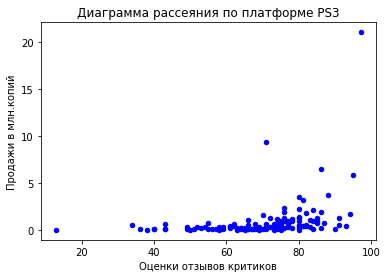

Расчет по Платформе PS4


user_score    -0.031957
total_sales    1.000000
Name: total_sales, dtype: float64

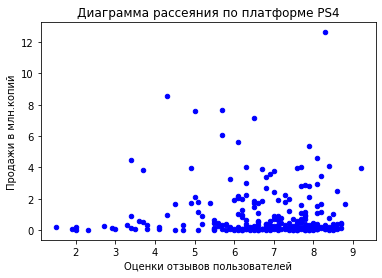

critic_score    0.406568
total_sales     1.000000
Name: total_sales, dtype: float64

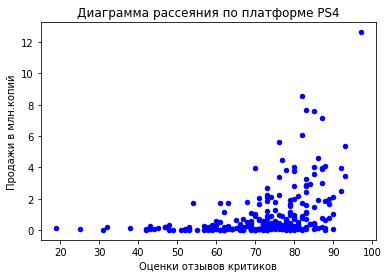

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score     0.000942
total_sales    1.000000
Name: total_sales, dtype: float64

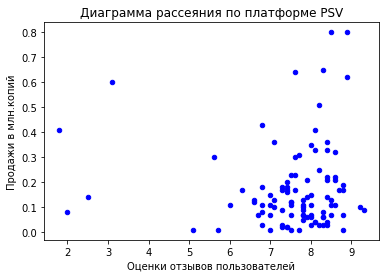

critic_score    0.254742
total_sales     1.000000
Name: total_sales, dtype: float64

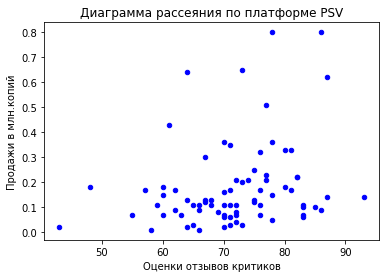

Расчет по Платформе Wii


user_score     0.682942
total_sales    1.000000
Name: total_sales, dtype: float64

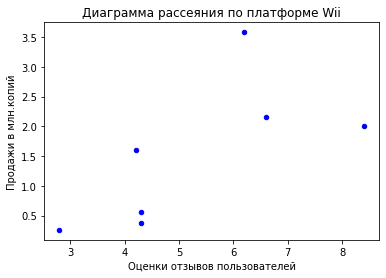

Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.41933
total_sales    1.00000
Name: total_sales, dtype: float64

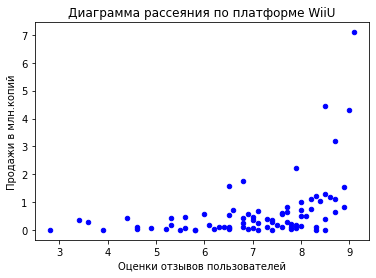

critic_score    0.376415
total_sales     1.000000
Name: total_sales, dtype: float64

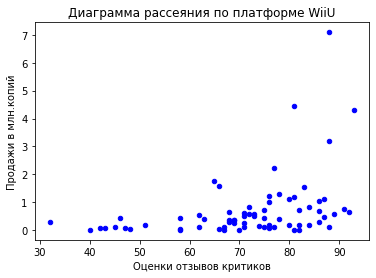

Расчет по Платформе X360


user_score    -0.011742
total_sales    1.000000
Name: total_sales, dtype: float64

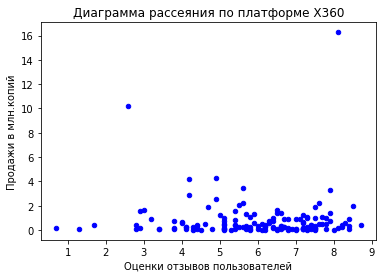

critic_score    0.350345
total_sales     1.000000
Name: total_sales, dtype: float64

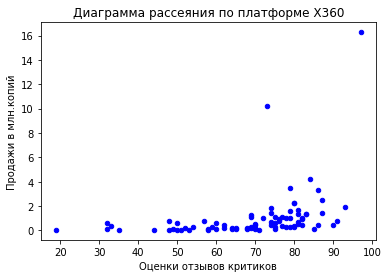

Расчет по Платформе XOne


user_score    -0.068925
total_sales    1.000000
Name: total_sales, dtype: float64

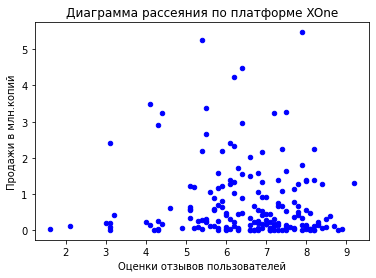

critic_score    0.416998
total_sales     1.000000
Name: total_sales, dtype: float64

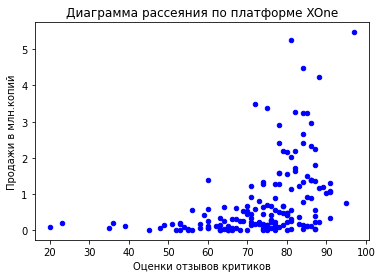

In [53]:
df_sc, y = new_data.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

Отличная функция, спасибо!

Расчет по Платформе 3DS


user_score     0.241504
total_sales    1.000000
Name: total_sales, dtype: float64

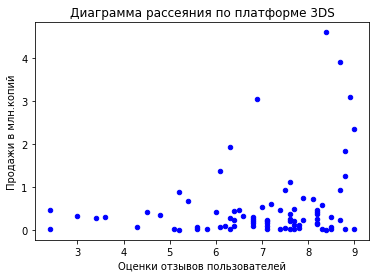

critic_score    0.357057
total_sales     1.000000
Name: total_sales, dtype: float64

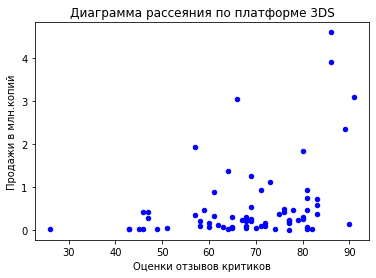

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score    -0.093842
total_sales    1.000000
Name: total_sales, dtype: float64

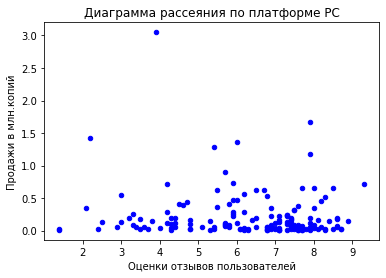

critic_score    0.19603
total_sales     1.00000
Name: total_sales, dtype: float64

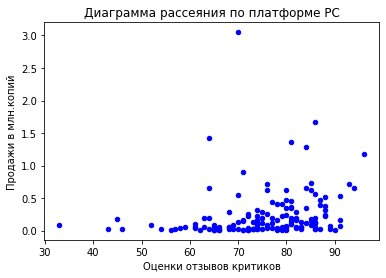

Расчет по Платформе PS3


user_score     0.002394
total_sales    1.000000
Name: total_sales, dtype: float64

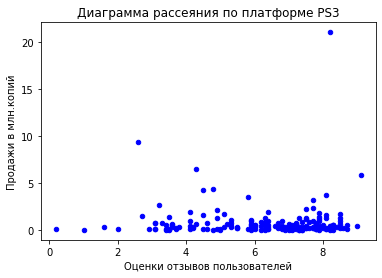

critic_score    0.334285
total_sales     1.000000
Name: total_sales, dtype: float64

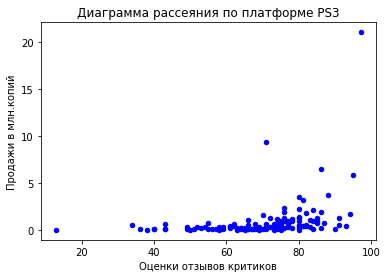

Расчет по Платформе PS4


user_score    -0.031957
total_sales    1.000000
Name: total_sales, dtype: float64

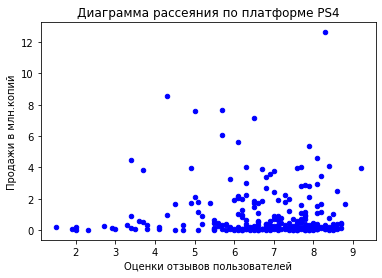

critic_score    0.406568
total_sales     1.000000
Name: total_sales, dtype: float64

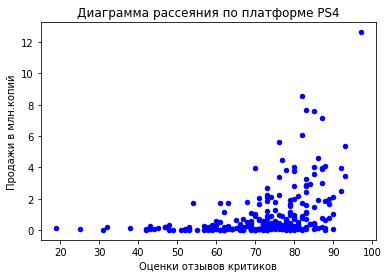

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score     0.000942
total_sales    1.000000
Name: total_sales, dtype: float64

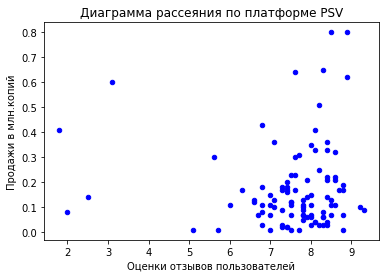

critic_score    0.254742
total_sales     1.000000
Name: total_sales, dtype: float64

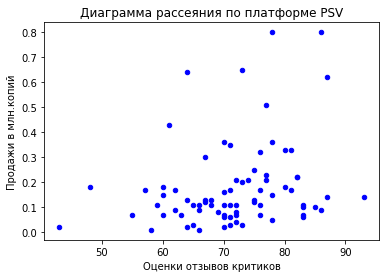

Расчет по Платформе Wii


user_score     0.682942
total_sales    1.000000
Name: total_sales, dtype: float64

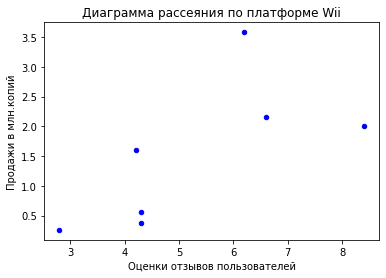

Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.41933
total_sales    1.00000
Name: total_sales, dtype: float64

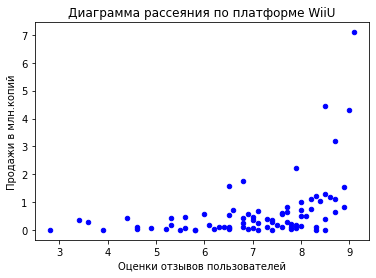

critic_score    0.376415
total_sales     1.000000
Name: total_sales, dtype: float64

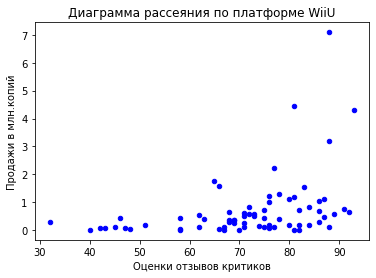

Расчет по Платформе X360


user_score    -0.011742
total_sales    1.000000
Name: total_sales, dtype: float64

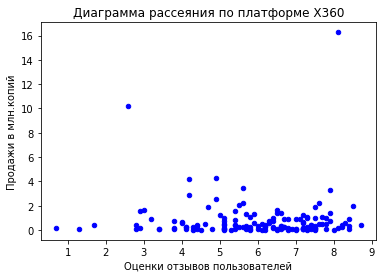

critic_score    0.350345
total_sales     1.000000
Name: total_sales, dtype: float64

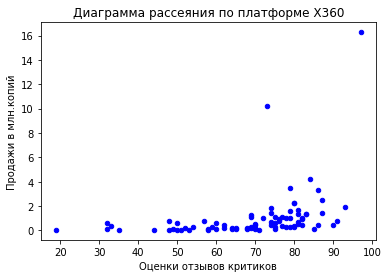

Расчет по Платформе XOne


user_score    -0.068925
total_sales    1.000000
Name: total_sales, dtype: float64

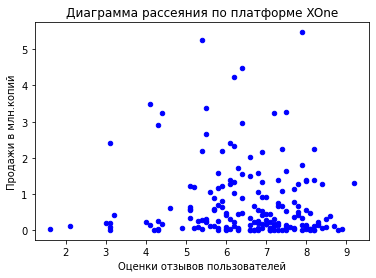

critic_score    0.416998
total_sales     1.000000
Name: total_sales, dtype: float64

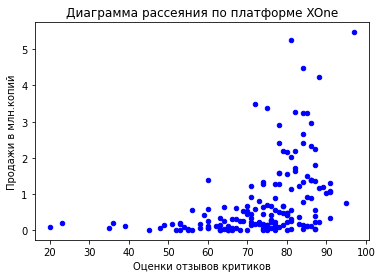

In [54]:
import matplotlib.pyplot as plt
df_sc, y = new_data.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

Исходя из полученных результатов можно сделать вывод, что связи между оценками пользователей слабее чем между продажами и оценками критиков

<span style="color:blue">3.8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</span> 

In [55]:
new_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


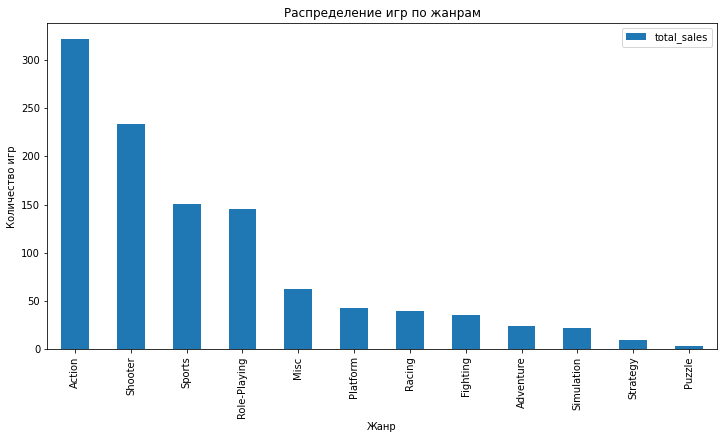

In [56]:
new_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind="bar",figsize=(12, 6));
plt.xlabel('Жанр')
plt.ylabel('Количество игр');
plt.title('Распределение игр по жанрам')
plt.show()

<span style="color:blue">Скорректировал графики, в дальнейшем я прошу дать комментарии под графиками которые надо переделать ещё раз</span> 

Топ 3 жанра по продажам: Action,Shooter, Sports. Самые слабые по продажам жанры: Simulation, Strategy, Puzzle

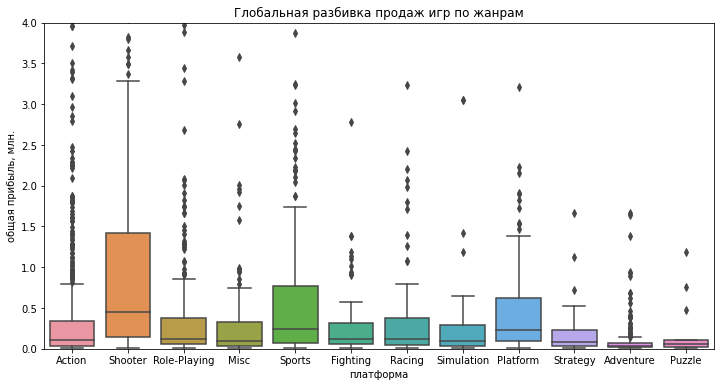

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=new_data)
plt.xlabel('платформа')
plt.ylabel('общая прибыль, млн.')
plt.title('Глобальная разбивка продаж игр по жанрам')
plt.ylim(0, 4);

Скорректировал

Как видим, самым стабильным жанром, который приносит доход не зависимо от платформы, является Shooter, значит, на этот жанр есть устойчивый спрос.

Вывод по исследовательскому анализу данных:
Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года произошел резкий спад разработок игр на игровые платформы.
Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
Средняя жизнь игровой платформы составляет 6-7 лет.
Больше всего было продано игр на Sony Playstation и Xbox 360.
У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
Самый популярный жанр за последние 10 лет: 'Action'. 

Шаг 4. Составьте портрет пользователя каждого региона

Определю для пользователя каждого региона (NA, EU, JP):

- Cамые популярные платформы (топ-5). Опишите различия в долях продаж.

In [58]:
na_actual_data_games_sales = new_data.query('na_sales > 0')

In [59]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

In [60]:
na_platform_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_pivot_table

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [61]:
eu_actual_data_games_sales = new_data.query('eu_sales > 0')

In [62]:
eu_platform_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_pivot_table

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [63]:
jp_actual_data_games_sales = new_data.query('jp_sales > 0')

In [64]:
jp_platform_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_pivot_table

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


Рейтинг платформ:

Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

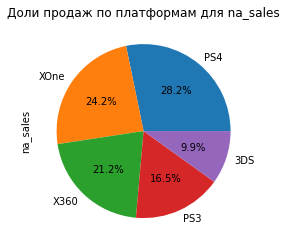

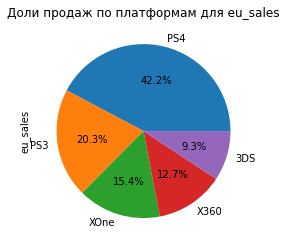

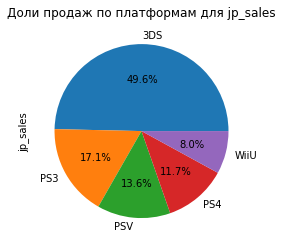

In [65]:
for name in region_sales:
    new_data.pivot_table(index='platform', values=name, aggfunc='sum'
                       ).sort_values(by=name, ascending=False
                                    ).head().plot(kind='pie', y=name, legend=False, autopct='%1.1f%%')
    plt.title(f'Доли продаж по платформам для {name}');

- Самые популярные жанры (топ-5). Поясните разницу.

In [66]:
pd.pivot_table(na_actual_data_games_sales, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [67]:
pd.pivot_table(eu_actual_data_games_sales, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [68]:
pd.pivot_table(jp_actual_data_games_sales, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


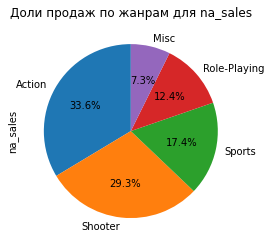

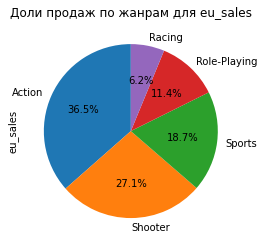

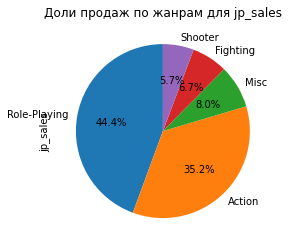

In [69]:
for name in region_sales:
    new_data.pivot_table(index='genre', values=name, aggfunc='sum'
                       ).sort_values(by=name, ascending=False
                                    ).head().plot(kind='pie', y=name, legend=False, autopct='%1.1f%%', startangle=90)
    plt.title(f'Доли продаж по жанрам для {name}');

Рейтинг жанров:

Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Расшифровка рейтинга ESRB:

EC (Early Childhood) — для детей младшего возраста
E (Everyone) — для всех
E10+ (Everyone 10 and older) — для всех старше 10 лет
T (Teen) — подросткам 13-19 лет
M (Mature 17+) — от 17 лет
AO (Adults only 18+) — только для взрослых
K-A (Kids to Adults)— для детей и взрослых
RP (Rating pending) — рейтинг ожидается

In [70]:
pd.pivot_table(na_actual_data_games_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)

,na_sales
rating,
M,165.21
No rating,89.42
E,79.05
E10+,54.24
T,49.79


In [71]:
pd.pivot_table(eu_actual_data_games_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)

,eu_sales
rating,
M,145.32
E,83.36
No rating,78.91
E10+,42.69
T,41.95


In [72]:
pd.pivot_table(jp_actual_data_games_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)

,jp_sales
rating,
No rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение.

Вывод по составлению портрета пользователя каждого региона

Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, и играет в основном в шутеры. 
Европейский игрок - от 17 лет, любит играть на PS4, и играет в основном в шутеры. 
Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит играть в  RPG и экшены.

Шаг 5. Проверю гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [73]:
xone = new_data[(new_data['platform']=='XOne') & (new_data['user_score']!=-1)]['user_score']
pc = new_data[(new_data['platform']=='PC') & (new_data['user_score']!=-1)]['user_score']

заглушка описана выше

In [74]:
xone.min(), pc.min()

(1.6, 1.4)

In [75]:
pc.min(), pc.min()

(1.4, 1.4)

In [76]:
alpha = 0.05
result = st.ttest_ind(xone, pc, equal_var = False)
print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


#Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC различаются

<span style="color:blue">Сформировав нулевую гипотезу (Н0) как:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. И альтернативную гипотезу (Н1) как:Средние пользовательские рейтинги платформ Xbox One и PC разные - получили значение P-value = 0.14. Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, больше порогового значения, т.е. данные не противоречат гипотезе, нулевую гипотезу опровергнуть не получилось./span> 

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
H1: Средние пользовательские рейтинги жанров Action и Sports разные.

<span style="color:blue">Т.к. нам требуется проверить гипотезу о равенстве среднего двух независимых выборок, то для ее проверки воспользуемся методом ttest_ind с параметром equal_var=False, т.е. есть основания предполагать, что их дисперсии разные. Зададим пороговое значение уровня значимости alpha = 0.05.Для проверки гипотезы будут использоваться данные с 2012 года.</span> 

In [77]:
action = new_data[(new_data['genre']=='Action') & (new_data['user_score']!=-1)]['user_score']
sports = new_data[(new_data['genre']=='Sports') & (new_data['user_score']!=-1)]['user_score']

In [78]:
action.min(), pc.min()

(2.0, 1.4)

In [79]:
sports.min(), pc.min()

(0.2, 1.4)

In [80]:
alpha = 0.05
result = st.ttest_ind(action, sports, equal_var = False)
print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Шаг 6. Общий вывод

C 1980 количество игр постепенно росло, пик пришёлся на 2008 и 2009 года, после чего количество выпускаемых игр пошло на спад;
Топ платформ по продажам: PS2, X360, PS3, Wii, DS, PS;
Срок актуальности платформы в среденем составляет 6-7 лет, после чего её заменят более современная модель;
Лидирующие позиции по продажам с 2014 по 2016 года занимают PS4 и XOne;
Прямой зависимости между продажами платформ и оценками игр критиками и пользователями не выявлено;
Наблюдается умеренная зависимость между продажами платформ PS4, XOne, X360 и оценками игр критиками;
Наибольшую долю рынка составляют игры жанра Action, за ними идут Shooter, Sports и Role-Playing. Игры с менее активным геймплеем сильно отстают;
Однако самым прибыльным и стабильным жанром является Shooter с очень большой разницей в сравнении с другими жанрами;
В Северной Америке преобладают PS4 и XOne. Более старые поколения и портативные приставки сильно отстают;
В Европе PS4 сильно лидирует в сравнении с другими платформами;
В Японии заметно преобладает портативная приставка своего же производства - Nintendo 3DS. Компании XBox в лидерах нет в принципе в сравнении с другими регионами;
В Северной Америке заметно преобладают продажи жанра Shooter;
В Европе заметно преобладают продажи жанра Shooter;
В Японии заметно преобладают продажи жанра RPG;
В Северной Америке и Европе виды рейтинга распределены одинаково: M -> E -> T -> E10+. Самая популярная категория 17+;
В Японии ситуация несколько иная: T -> E -> M -> E10+. Самые популярные игры в Японии являются японскими. Самая популярная категория ESRB - 13+;
Игры на XOne и PC имеют разный пользовательский рейтинг;
Средний пользовательский рейтинг игр жанров 'Action' и 'Sports' сильно отличается.

<span style="color:blue">В результате анализа данных о продажах игр за актуальный период с 2014 по 2016 года включительно, были выявлены следующие закономерности:

В целом по миру показыват рост только две платформы PS4 и XOne, отальные платформы 3DS, PS3, WiiU, PC, PSV — падают, но остаются потенциально прибыльными. Платформа PS4 — лидирует по продажам, платформа XOne — на втором месте.\
В Северной Америке и Европе самая популярная плаформа PS4, на втором месте XOne.
В Японии самая популярная плаформа 3DS, на втором месте PS4. XOne в Японии не популярна.

В целом по миру самые высокие продажи в жанрах Action и Shooter, на втором месте Role-Playing и Sports.
В Северной Америке и Европе самые популярные жанры Shooter и Action, занимают примерно равные доли по продажам, на третьем месте жанр Sports, на четвертом — Role-Playing.
В Японии самые популярные жанры Role-Playing и Action, остальные жанры не столь популярны.

Отзывы критиков незначительно влияют на продажи игр.
Отзывы пользователей практически не влияют на продажи.\
Исходя из проверки гипотез можно предположить, что средние пользовательские рейтинги платформ примерно равны, а средние пользовательские рейтинги жанров различаются.</span> 